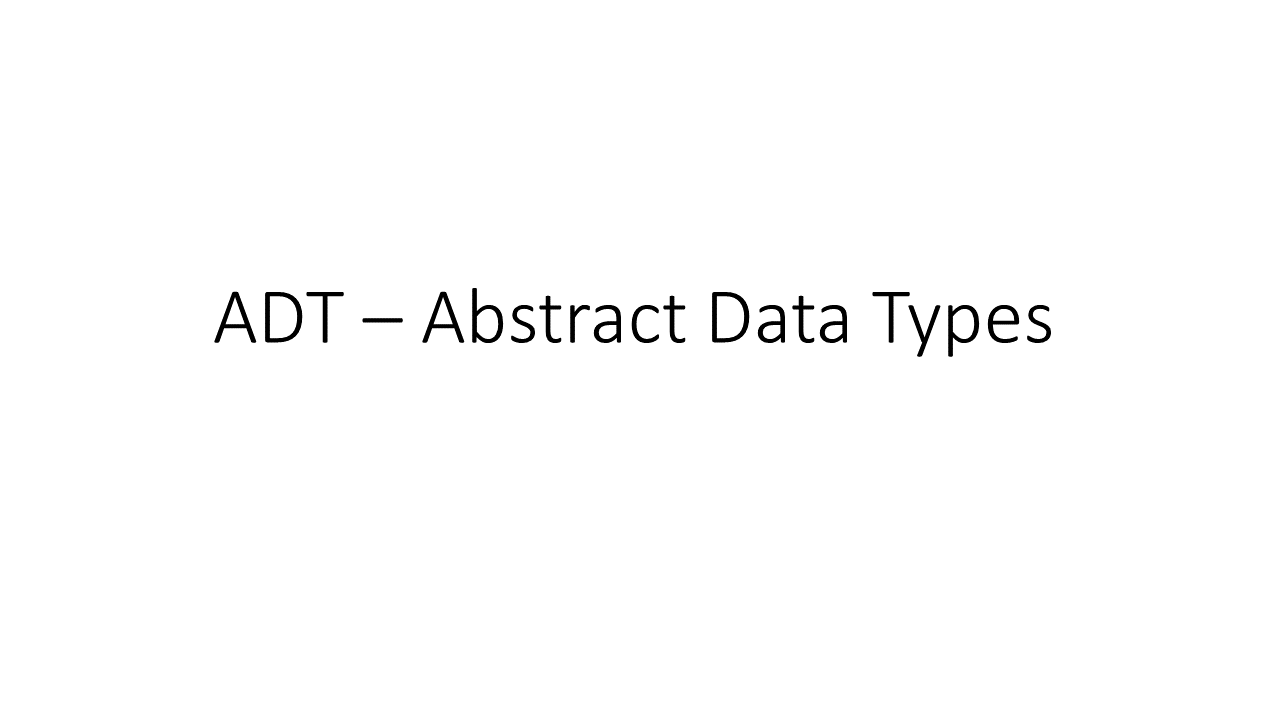

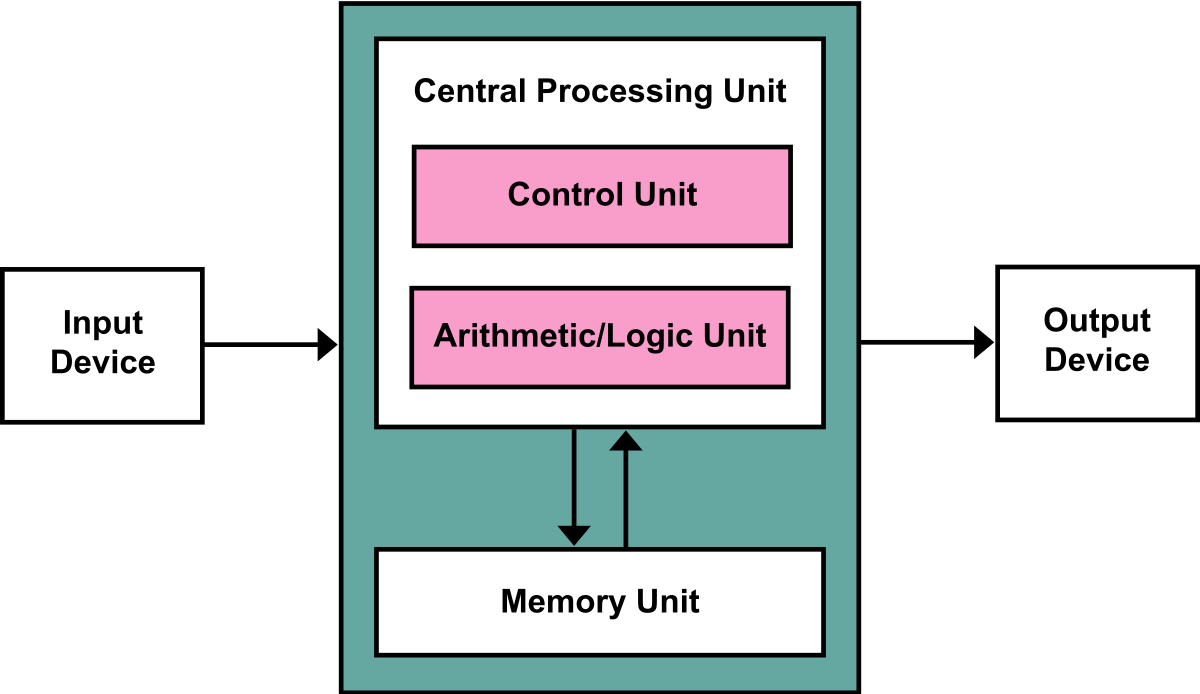

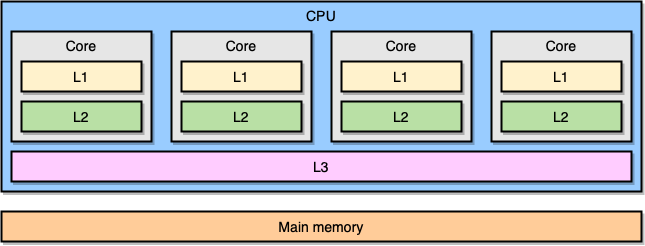

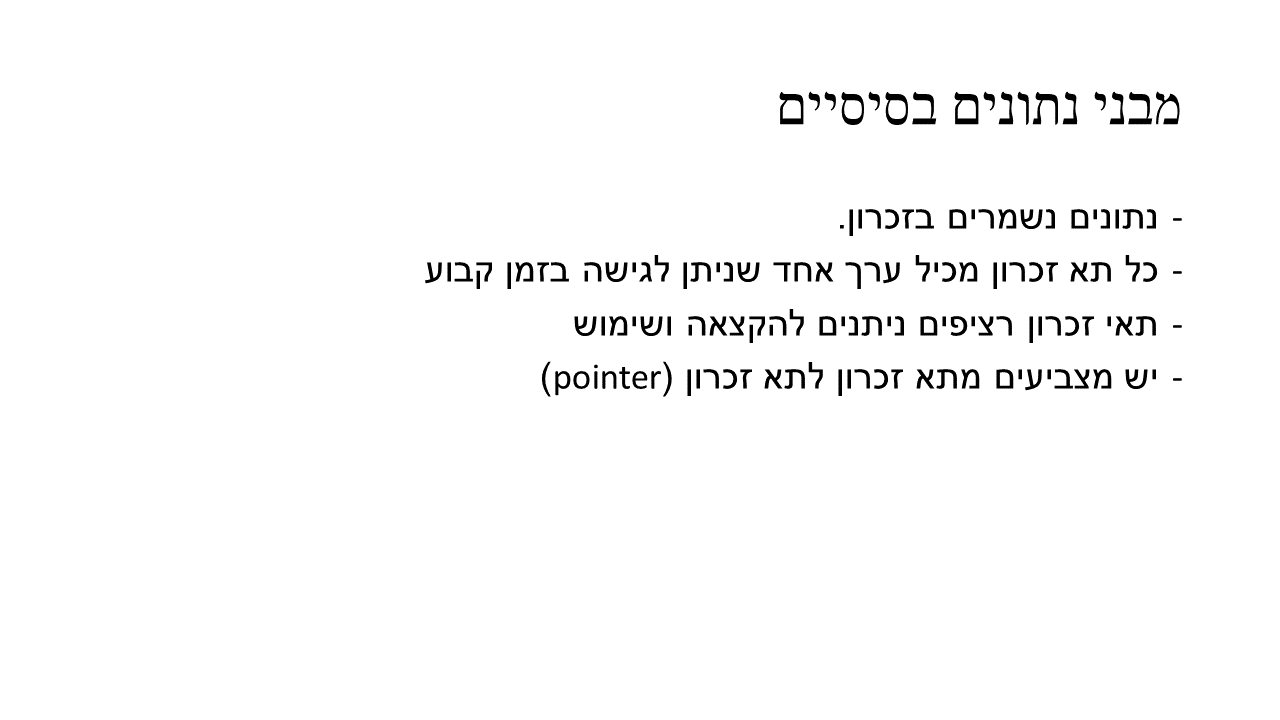

In [1]:
memory = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
memory[0]
memory[4]
memory[7]
# allocated from 3 to 6
sub_memory = memory[3:6]
print(sub_memory)
sub_memory[1]
sub_memory[2]

[3, 4, 5]


5

In [2]:
sub_memory[1] = 2
print(sub_memory[sub_memory[1]])

5


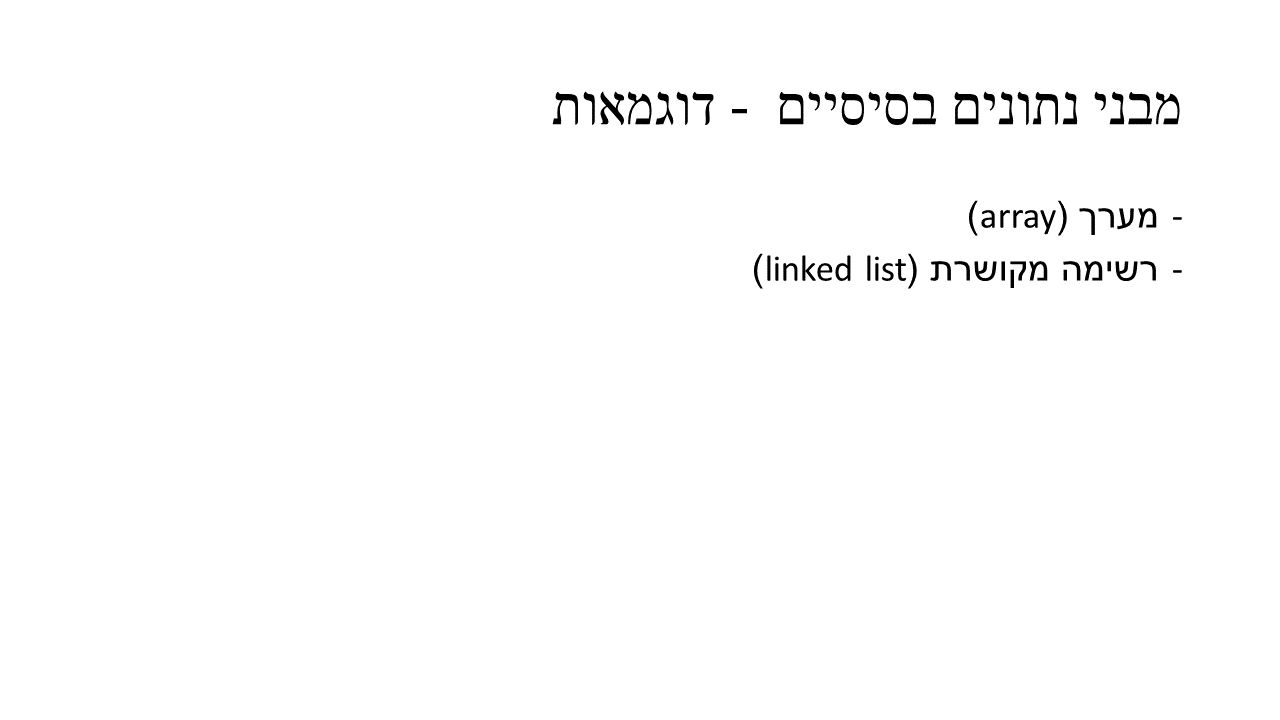

In [3]:
import numpy as np
import pandas as pd
import math
import graphviz 
from graphviz import nohtml

from IPython.display import display

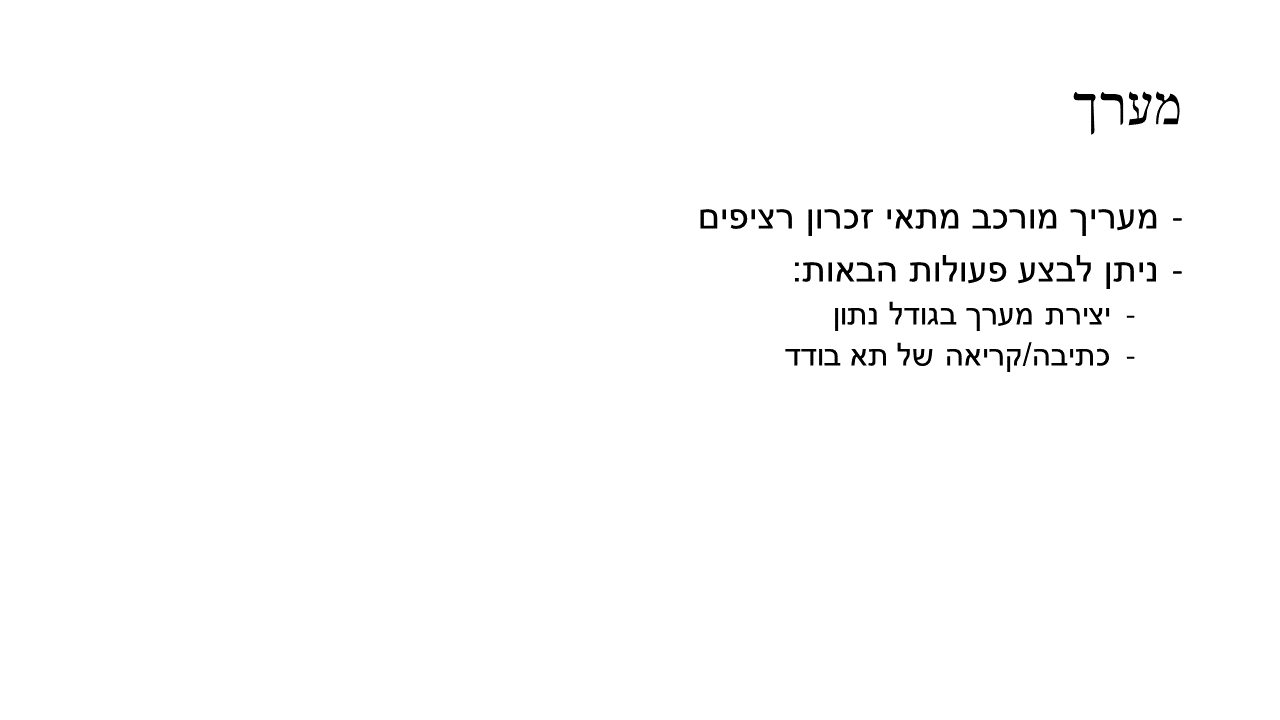

In [4]:
ar = [1, 2, 3, 4, 5]
print(ar)

[1, 2, 3, 4, 5]


In [5]:
len(ar)

5

In [6]:
print(ar[3])
ar[3] = 7
print(ar)

4
[1, 2, 3, 7, 5]


Characteristics:
1. contains values of the same size
2. array is allocated of a given size consequently in memory 
3. Keep: length + memory location of the data 

Pros:
1. Access to any member is O(1) = index * size(value) + (start location of data)

Cons:
1. Resize - requires allocation of a new one and copy

In [7]:
class DummyArray:
    def __init__(self, n, value_size):
        self.size = n
        self.value_size = value_size
        self.data = [0 for x in range(n*value_size)]
        
    def put(self, n, a1):
        if n < self.size:
            return
        # inmemory: self.data + value_size * n 
        # c[4] = 3
        # 4[c] = 3
        # (4 + c) = 3 
        self.data[self.value_size * n] = a1
        
    def get(self, n):
        return self.data[self.value_size *n]
    
    def Print(self):
        print("Size:", self.size)
        print("Data:", self.data)
    
    def resize(self, m):
        if n >= m:
            self.size = m
            return
        else:
            # for x range(m * value_size):
            #    data[x] = 0
            data = [0 for x in range(m*value_size)]
            for i in range(len(self.data) -1):
                data[i] = self.data[i]
            self.data = data
            # O(m + n) < O(2m) = O(m)
    
da = DummyArray(20, 2)
print(da)
da.Print()
da.put(1, 1)
da.Print()
da.put(2, 3)
da.put(3, 5)

x = da.get(2)
print("x=", x)

Size: 20
Data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Size: 20
Data: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
x= 0


In [8]:
ba = []
ba.append(1)
print(ba)
ba.append(23)
print(ba)
ba[2] = 4

[1]
[1, 23]


IndexError: list assignment index out of range

## Linked List

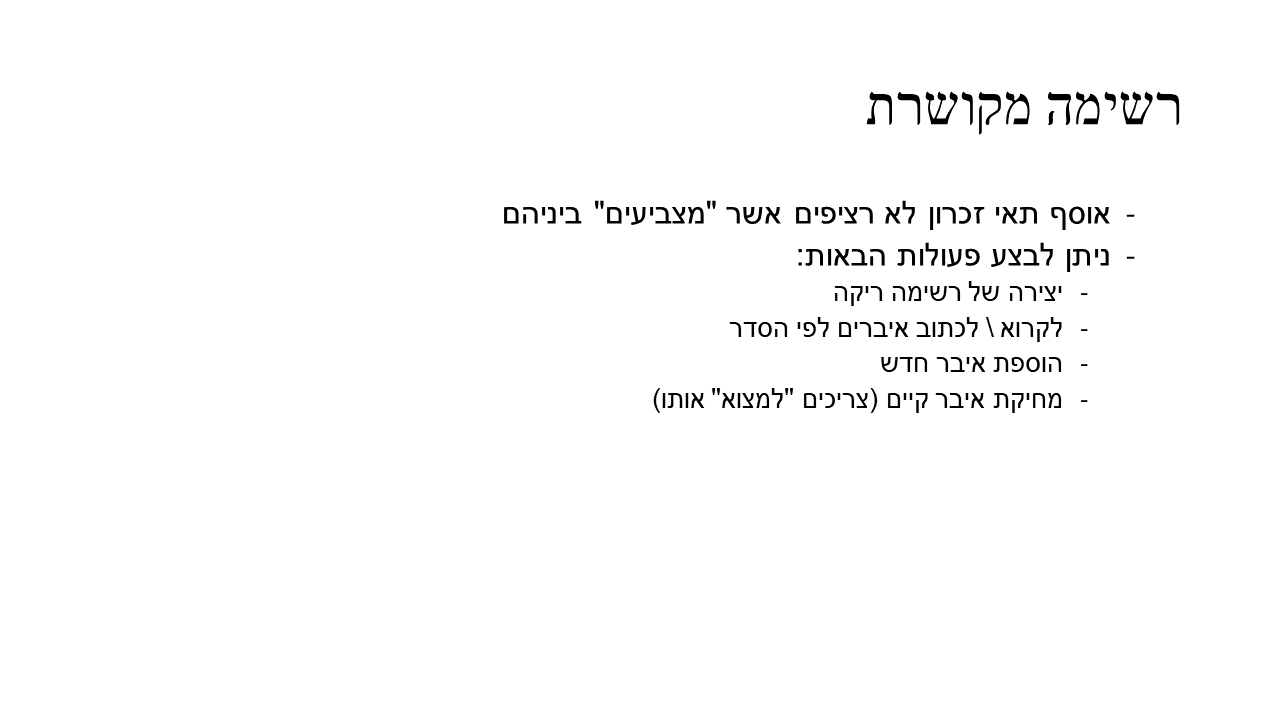

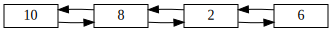

In [9]:
g = graphviz.Digraph('g', filename='btree.gv',
                     node_attr={'shape': 'record', 'height': '.1'})

g.graph_attr['rankdir'] = 'LR'
g.graph_attr['center'] = 'true'
#g.node('node0', nohtml('<f0> |<f1> 10| <f2>'))
#g.node('node1', nohtml('<f0> |<f1> 8| <f2>'))
#g.node('node2', nohtml('<f0> |<f1> 2| <f2>'))
#g.node('node3', nohtml('<f0> |<f1> 6| <f2>'))

g.node('node0', label='10')
g.node('node1', label='8')
g.node('node2', label='2')
g.node('node3', label='6')

g.edge('node0', 'node1')
g.edge('node1', 'node0')

g.edge('node1', 'node2')
g.edge('node2', 'node1')

g.edge('node2', 'node3')
g.edge('node3', 'node2')
#g.view()
display(g)

In [10]:
global_i = 0
global_counter = 0

def func():
    global global_i
    global global_couter 
    temp = global_i
    global_i += 1
    if global_i > global_counter:
        global_i -= 1
        return None
    else:
        return temp

def func_init(counter):
    global_counter = counter
    global_i = 0
#---------------------------------

class Func():
    def __init__(self, counter):
        # global_counter = counter
        # global_i = 0
        print("in init")
        
    def func():
        global global_i
        global global_couter 
        temp = global_i
        global_i += 1
        if global_i > global_counter:
            global_i -= 1
            return None
        else:
            return temp

        

#---------------------------------

f = Func(2)
f1 = Func(5)
f.func()
f.func()

    
func_init(2)
print(func()) # 0
print(func()) # 1 
print(func()) # 2
print(func()) # None 

func_init(1)
print(func()) # 0 
print(func()) # 1 
print(func()) # None


func_init(10)
i = func()
while i != None:
    #do_something
    i = func()

in init
in init


TypeError: Func.func() takes 0 positional arguments but 1 was given

In [11]:
global_i = 0
global_counter = 0

def func():
    global global_i
    global global_couter 
    temp = global_i
    global_i += 1
    if global_i > global_counter:
        global_i -= 1
        return None
    else:
        return temp

def func_init(counter):
    global_counter = counter
    global_i = 0
#---------------------------------

class Func():
    def __init__(self, counter):
        # global_counter = counter
        # global_i = 0
        print("in init")
        
    def func():
        global global_i
        global global_couter 
        temp = global_i
        global_i += 1
        if global_i > global_counter:
            global_i -= 1
            return None
        else:
            return temp

        

#---------------------------------

f = Func(2)
f1 = Func(5)
f.func()
f1.func()

    
func_init(2)
print(func()) # 0
print(func()) # 1 
print(func()) # 2
print(func()) # None 

func_init(1)
print(func()) # 0 
print(func()) # 1 
print(func()) # None


func_init(10)
i = func()
while i != None:
    #do_something
    i = func()

in init
in init


TypeError: Func.func() takes 0 positional arguments but 1 was given

In [17]:
class Node:
    def __init__(self, val):
        self.val = val
        self.next = None
        self.prev = None
        
class LinkedList: 
    def __init__(self, name=""):
        self.name = name
        self.head = None
        self.tail = None
        self.size = 0
        self.cursor = None
        self.limit = None
        
    def set_limit(self, n):
        self.limit = n
        
    def length(self):
        return self.size
        
    def print(self):
        print("Print (", self.name, "):")
        node = self.head
        while node != None:
            print(node.val, "\t")
            node = node.next
        print("-----")
    
    def add_tail(self, val):
        if self.limit != None and self.size >= self.limit:
            print("Error: limit reached")
            return 
        newNode = Node(val)
        if self.size == 0:
            self.head = newNode
            self.tail = self.head
        else:
            self.tail.next = newNode
            newNode.prev = self.tail
            self.tail = newNode
        self.size += 1

    def next_val(self):
        if self.cursor == None:
            self.cursor = self.head
        else:
            self.cursor = self.cursor.next

        if self.cursor != None:
            return self.cursor.val
        else:
            return None
        
    def delete_head(self):
        if self.size == 0:
            return
        else:
            self.head = self.head.next
            self.head.prev = None

    def get_value(self, index):
        # return self.array[index]
        if self.size < index:
            return None
        node = self.head
        cur_index = 0
        while node != None:
            if cur_index == index:
                return node.val
            else:
                node = node.next 
                cur_index += 1
    
ll = LinkedList()
print(ll.length())
ll.print()

ll.add_tail(10)

print(ll.length())
ll.print()

print(ll)

ll.add_tail(11)
#ll.set_limit(2)
ll.add_tail(12)
ll.print()

# print(ll.next_val())
# print(ll.next_val())
# print(ll.next_val())
# print(ll.next_val())
# cursor moves to head again
# print(ll.next_val())

ll.delete_head()
ll.print()

0
Print (  ):
-----
1
Print (  ):
10 	
-----
Print (  ):
10 	
11 	
12 	
-----
Print (  ):
11 	
12 	
-----


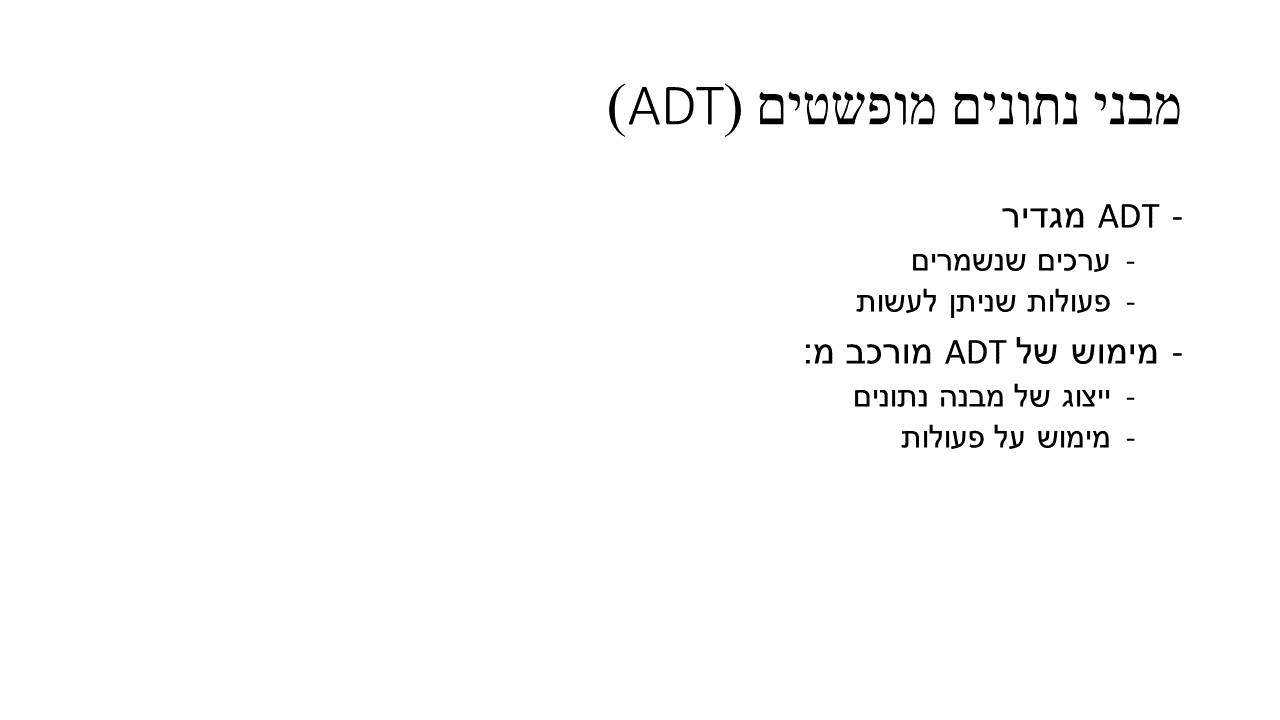

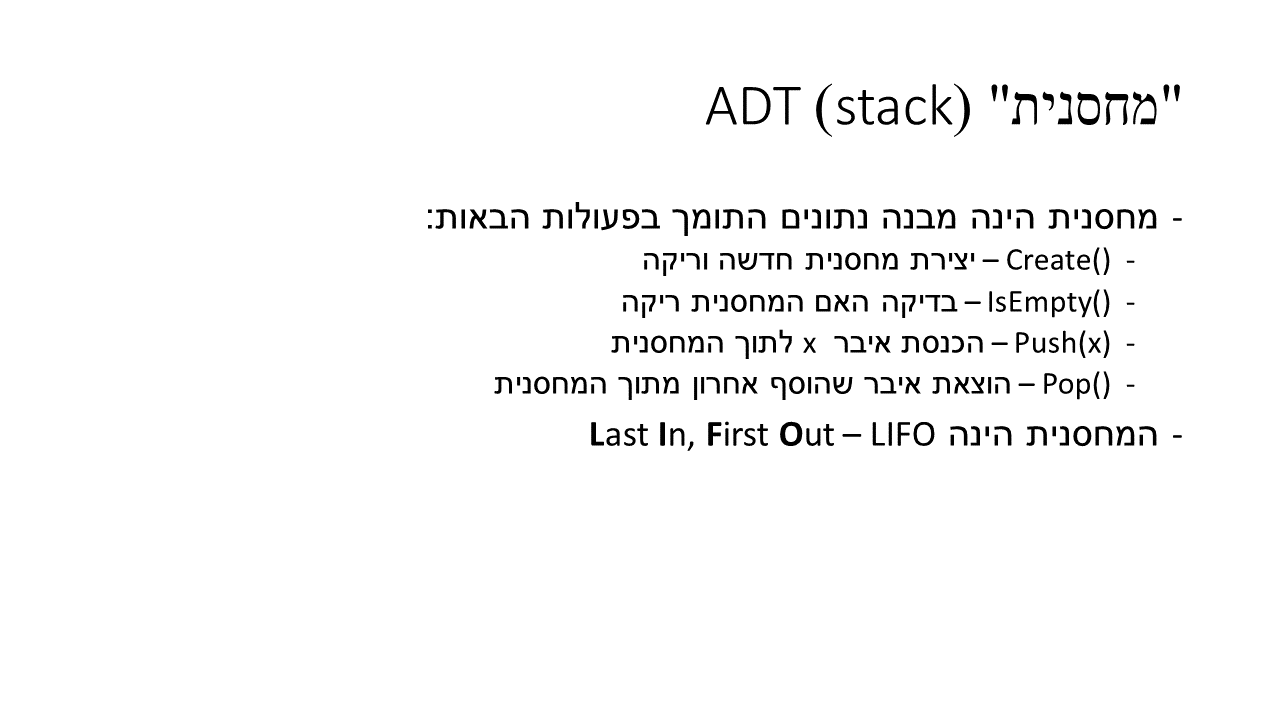

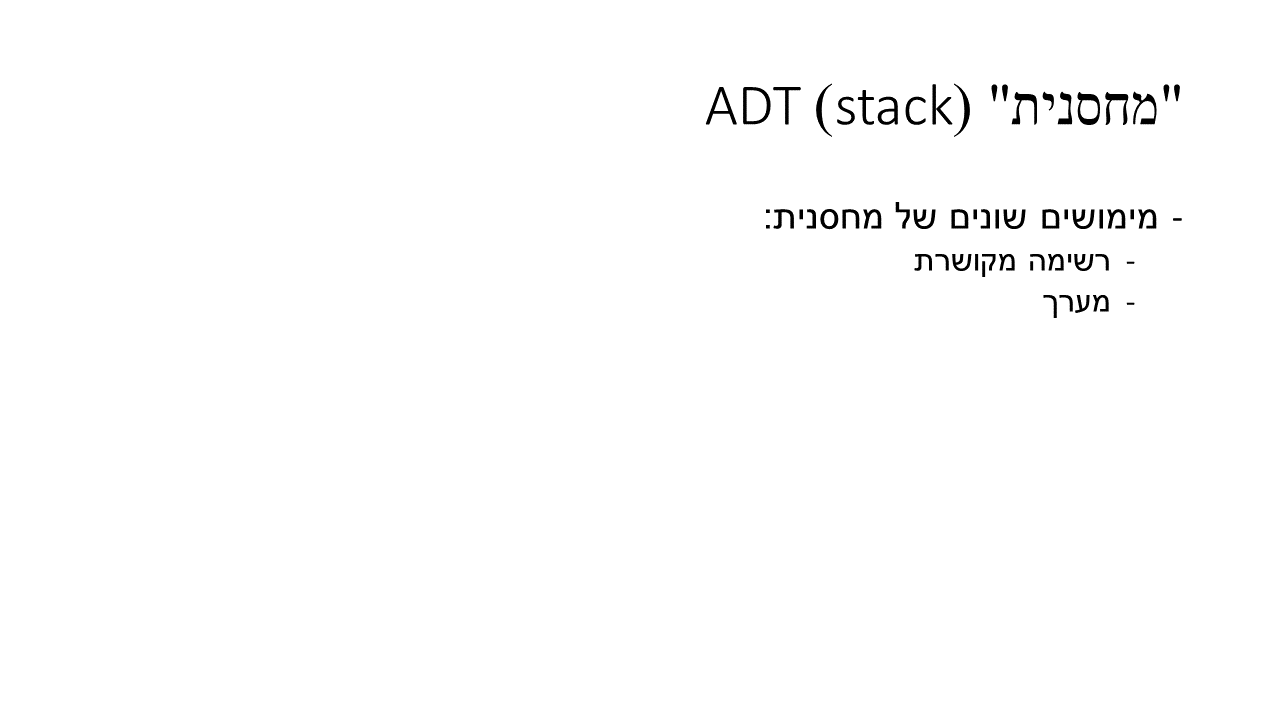

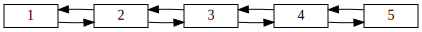

5
6
4
3
2
1
None
end


In [20]:
# stack implementation with linked list 
class Node:
    def __init__(self, val, name):
        self.val = val
        self.next = None
        self.prev = None
        self.name = name


class Stack:
    def __init__(self):
        self.head = self
        self.tail = self
        self.size = 0

    def Create(self):
        self.head = None
        self.tail = self.head
        self.size = 0
        self.nodeName = 0

    def IsEmpty(self):
        return self.size == 0

    def Push(self, val):
        if self.IsEmpty():
            self.head = Node(val, "node" + str(self.nodeName))
            self.tail = self.head
        else:
            self.tail.next = Node(val, "node" + str(self.nodeName))
            self.tail.next.prev = self.tail
            self.tail = self.tail.next
        self.size += 1
        self.nodeName += 1

    def Pop(self):
        if self.IsEmpty():
            return None
        else:
            tail_val = self.tail.val
            self.tail = self.tail.prev
            if self.tail != None:
                self.tail.next = None
            self.size -= 1
            return tail_val

    def ToGraph(self, filename):
        g = graphviz.Digraph('g', filename=filename,
                             node_attr={'shape': 'record', 'height': '.1'})
        g.graph_attr['rankdir'] = 'LR'
        g.graph_attr['center'] = 'true'

        node = self.head
        while node != None:
            g.node(node.name, label=str(node.val))
            if node.next != None:
                g.edge(node.name, node.next.name)
            if node.prev != None:
                g.edge(node.name, node.prev.name)
            node = node.next
            
        
        #g.view()
        display(g)

def main():
    stack = Stack()
    stack.Create()
    stack.Push(1)
    stack.Push(2)
    stack.Push(3)
    stack.Push(4)
    stack.Push(5)

    stack.ToGraph("stack.gv")
    print(stack.Pop())
    
    stack.Push(6)
    
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())

if __name__ == '__main__':
    main()
    print("end")

In [30]:
# implementation of  stack with array
# implement Stack using array
class Stack:
    # Invariant: tail always points to the index of last value
    def __init__(self):
        self.array = [0 for i in range(100)]
        
    def Create(self):
        self.tail = -1
        
    def IsEmpty(self):
        return self.tail == -1

    def Push(self, val):
        if self.tail == 99:
            return

        if self.IsEmpty():
            self.array[0] = val
            self.tail = 0
        else:
            self.array[self.tail + 1] = val
            self.tail += 1

    def Pop(self):
        if self.IsEmpty():
            return None
        else:
            tail_val = self.array[self.tail]
            self.tail -= 1
            return tail_val

    def Size(self):
        return self.tail + 1
            

def main():
    stack = Stack()
    stack.Create()
    print("Size of an empty stack:", stack.Size(), "(tail is", stack.tail, ")")
    stack.Push(1)
    stack.Push(2)
    stack.Push(3)
    
    print(stack.array)
    
    stack.Push(4)
    stack.Push(5)
    
    print("size:", stack.Size())
    
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())

if __name__ == '__main__':
    main()

Size of an empty stack: 0 (tail is -1 )
[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
size: 5
5
4
3
2
1
None
None


In [32]:
# implementation of  stack with array
# implement Stack using array
class Stack:
    # Invariant: tail always points to the index of the next empty slot
    def __init__(self):
        self.array = [0 for i in range(100)]
        
    def Create(self):
        self.tail = 0
        
    def IsEmpty(self):
        return self.tail == 0

    def Push(self, val):
        if self.tail == 100:
            return
        self.array[self.tail] = val
        self.tail += 1
        
    def Pop(self):
        if self.IsEmpty():
            return None
        else:
            tail_val = self.array[self.tail]
            self.tail -= 1
            return tail_val

    def Size(self):
        return self.tail 
            

def main():
    stack = Stack()
    stack.Create()
    print("Size of an empty stack:", stack.Size(), "(tail is", stack.tail, ")")
    stack.Push(1)
    stack.Push(2)
    stack.Push(3)
    
    print(stack.array)
    
    stack.Push(4)
    stack.Push(5)
    
    print("size:", stack.Size(), "(tail is", stack.tail, ")")
    
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())
    print(stack.Pop())

if __name__ == '__main__':
    main()

Size of an empty stack: 0 (tail is 0 )
[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
size: 5 (tail is 5 )
0
5
4
3
2
None
None


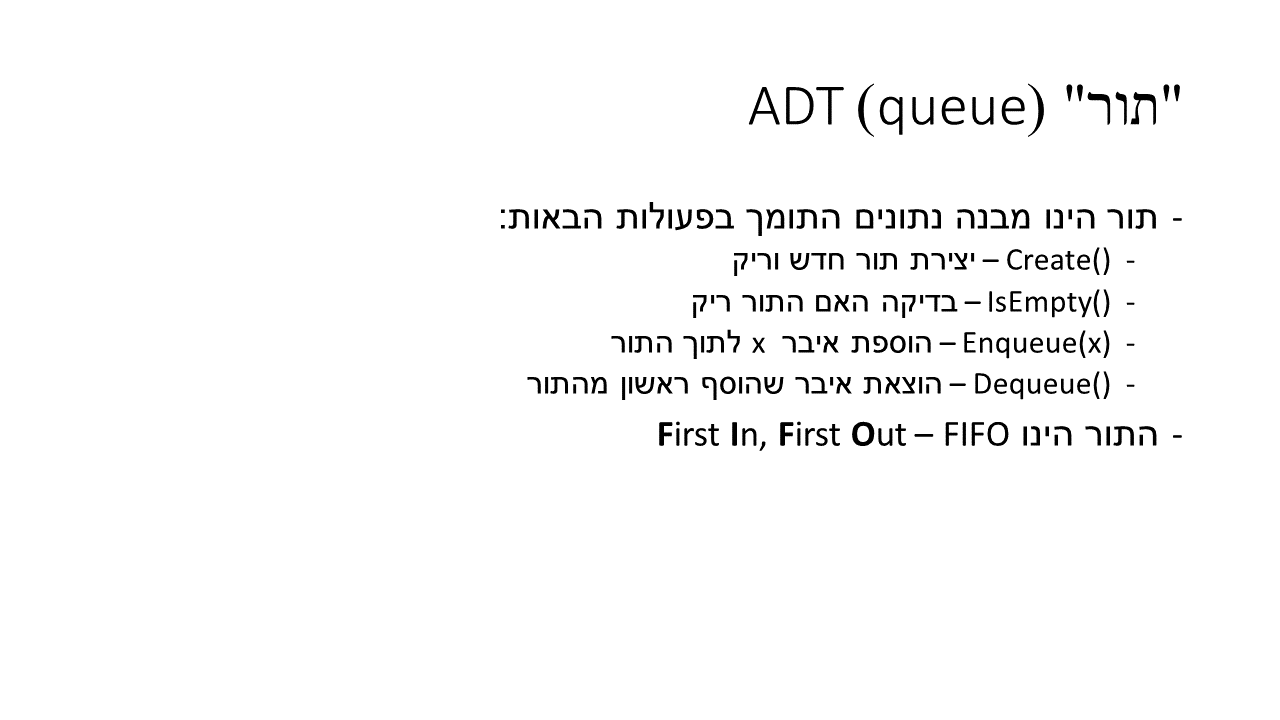

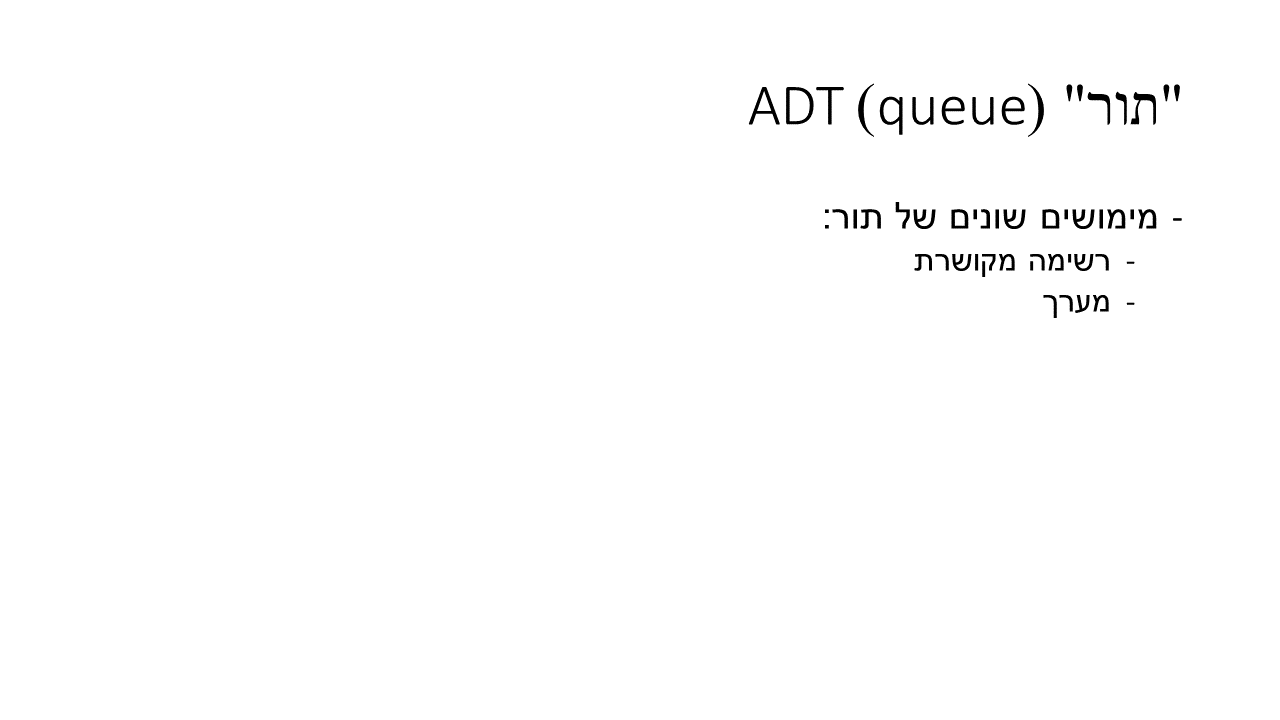

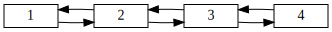

1
2
3
4
5
None
None


In [23]:
# Implementation of queue with linked list 
class Node:
    def __init__(self, val, name):
        self.val = val
        self.next = None
        self.prev = None
        self.name = name

class Queue:
    def __init__(self) -> None:
        self.head = None
        self.tail = None
        self.size = 0

    def Create(self) -> None:
        self.head = None
        self.tail = self.head
        self.size = 0
        self.nodeName = 0

    def Enqueue(self, val) -> None:
        if self.size == 0:
            self.head = Node(val, "node" + str(self.nodeName))
            self.tail = self.head
        else:
            self.tail.next = Node(val, "node" + str(self.nodeName))
            self.tail.next.prev = self.tail
            self.tail = self.tail.next
        self.size += 1
        self.nodeName += 1

    def Dequeue(self) -> int:
        if self.size == 0:
            return None
        else:
            head_val = self.head.val
            self.head = self.head.next
            if self.head != None:
                self.head.prev = None
            self.size -= 1
            return head_val
            
    def IsEmpty(self) -> bool:
        return self.size == 0

    def ToGraph(self, filename):
        g = graphviz.Digraph('g', filename=filename,
                             node_attr={'shape': 'record', 'height': '.1'})
        g.graph_attr['rankdir'] = 'LR'
        g.graph_attr['center'] = 'true'

        node = self.head
        while node != None:
            g.node(node.name, label=str(node.val))
            if node.next != None:
                g.edge(node.name, node.next.name)
            if node.prev != None:
                g.edge(node.name, node.prev.name)
            node = node.next
            
        #g.view()
        display(g)

def main():
    q = Queue()
    q.Create()
    q.Enqueue(1)
    q.Enqueue(2)
    q.Enqueue(3)
    q.Enqueue(4)
    
    q.ToGraph("queue.gv")
    
    q.Enqueue(5)
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())


if __name__ == '__main__':
    main()

In [56]:
# Implementation of queue with array (cyclic "buffer")
class Queue:
    def __init__(self, val) -> None:
        self.asize = val
        pass

    # Invariant: head is the index of the first value
    # Invariant: tail is the index of the last value
    def Create(self) -> None:
        self.head = 0
        self.tail = -1
        self.size = 0
        self.array = [0 for i in range(self.asize)]

    def Enqueue(self, val) -> None:
        if self.size == self.asize:
            return None
        
        if self.tail == self.asize - 1:
            self.tail = -1
        
        self.tail = self.tail + 1
        self.array[self.tail] = val
        self.size += 1

    def Dequeue(self) -> int:
        if self.size == 0:
            return None
        else:
            head_val = self.array[self.head]
            self.array[self.head] = -1
            self.head = self.head + 1
            self.size -= 1
            return head_val
            
    def IsEmpty(self) -> bool:
        return self.size == 0

    def Size(self):
        return self.size
    

def main():
    q = Queue(5)
    q.Create()
    q.Enqueue(10)
    q.Enqueue(20)
    q.Enqueue(30)
    q.Enqueue(40)
    q.Enqueue(50)
    q.Enqueue(60)
    
    print(q.array)
    
    print(q.Dequeue())
    print(q.Dequeue())
    print(q.Dequeue())
    
    print(q.array)
    print("Size:", q.Size(), "(head: ", q.head, ", tail:", q.tail, ")")
    
    q.Enqueue(60)
    q.Enqueue(70)
    q.Enqueue(80)
    q.Enqueue(90)
    print(q.Dequeue())
    q.Enqueue(90)
    print(q.array, "(head: ", q.head, ", tail:", q.tail, ")")
    
if __name__ == '__main__':
    main()

[10, 20, 30, 40, 50]
10
20
30
[-1, -1, -1, 40, 50]
Size: 2 (head:  3 , tail: 4 )
40
[60, 70, 80, 90, 50] (head:  4 , tail: 3 )


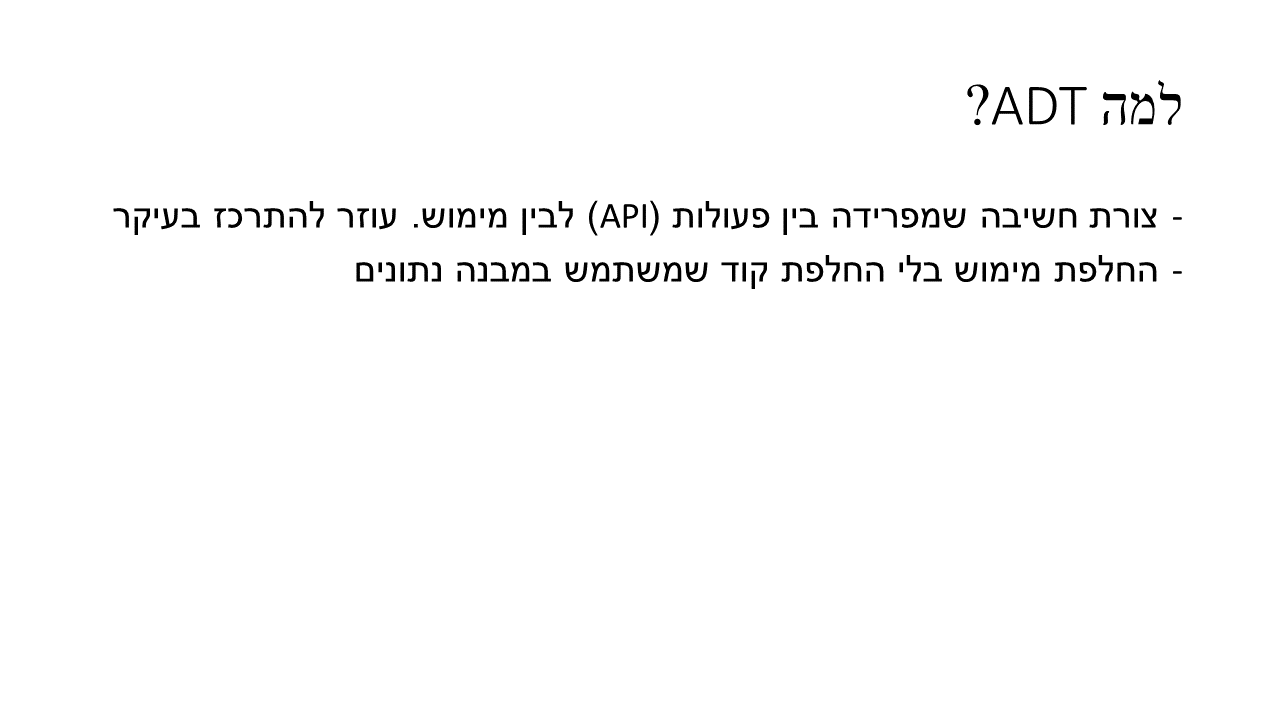

In [8]:
# final excersize with time measurement